In [1]:
import tensorflow_datasets as tfds
from tensorflow.keras.layers import *
import tensorflow as tf

from sklearn.model_selection import train_test_split
import numpy as np

## Load data

In [ ]:
dataset, info = tfds.load(
    "svhn_cropped",
    with_info=True
)

In [3]:
info

tfds.core.DatasetInfo(
    name='svhn_cropped',
    full_name='svhn_cropped/3.0.0',
    description="""
    The Street View House Numbers (SVHN) Dataset is an image digit recognition
    dataset of over 600,000 digit images coming from real world data. Images are
    cropped to 32x32.
    """,
    homepage='http://ufldl.stanford.edu/housenumbers/',
    data_path=PosixGPath('/tmp/tmpfa8guf4jtfds'),
    file_format=tfrecord,
    download_size=1.47 GiB,
    dataset_size=1.07 GiB,
    features=FeaturesDict({
        'image': Image(shape=(32, 32, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'extra': <SplitInfo num_examples=531131, num_shards=8>,
        'test': <SplitInfo num_examples=26032, num_shards=1>,
        'train': <SplitInfo num_examples=73257, num_shards=1>,
    },
    citation=""""""Street View House Numbers (SVHN) Dataset, cropped version."""

In [4]:
info.features['label'].names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

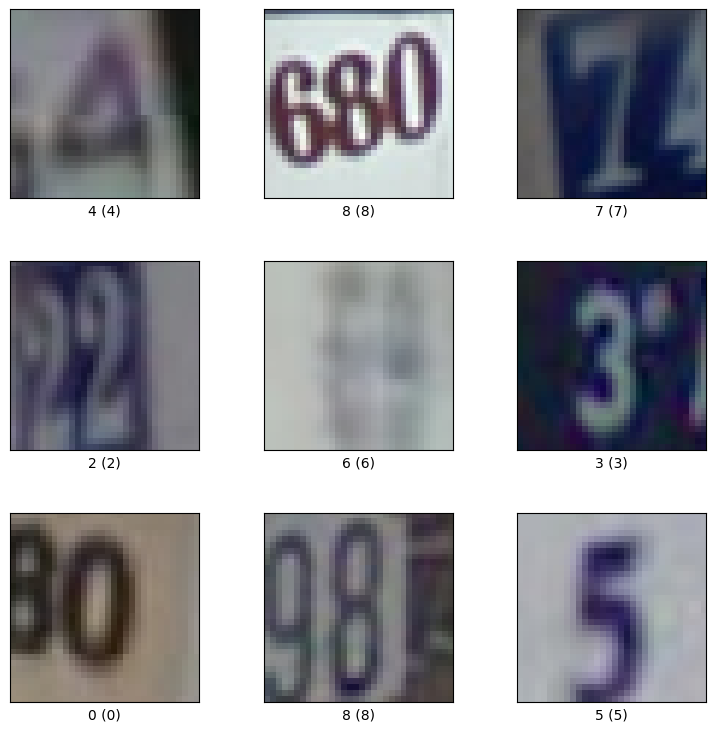

In [5]:
fig = tfds.show_examples(dataset, info)

## Image processing

In [6]:
def preprocess(image):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    return image

In [7]:
images = []
labels = []
for i in dataset:
    images.append(preprocess(i['image'].numpy()))
    labels.append(i['label'].numpy())

images = np.array(images)
labels = np.array(labels).astype('uint32')

In [8]:
images.shape, labels.shape

((73257, 32, 32, 3), (73257,))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((65931, 32, 32, 3), (7326, 32, 32, 3), (65931,), (7326,))

## Build model

In [10]:
model = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train[0].shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(info.features['label'].num_classes, activation='softmax')
])

In [11]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10
)

Epoch 1/10
2061/2061 [==============================] - 23s 6ms/step - loss: 0.7119 - accuracy: 0.7765 - val_loss: 0.3952 - val_accuracy: 0.8836
Epoch 2/10
2061/2061 [==============================] - 9s 5ms/step - loss: 0.3753 - accuracy: 0.8870 - val_loss: 0.3137 - val_accuracy: 0.9070
Epoch 3/10
2061/2061 [==============================] - 10s 5ms/step - loss: 0.3177 - accuracy: 0.9063 - val_loss: 0.3124 - val_accuracy: 0.9062
Epoch 4/10
2061/2061 [==============================] - 11s 5ms/step - loss: 0.2831 - accuracy: 0.9155 - val_loss: 0.2901 - val_accuracy: 0.9158
Epoch 5/10
2061/2061 [==============================] - 11s 5ms/step - loss: 0.2536 - accuracy: 0.9251 - val_loss: 0.3016 - val_accuracy: 0.9144
Epoch 6/10
2061/2061 [==============================] - 10s 5ms/step - loss: 0.2326 - accuracy: 0.9302 - val_loss: 0.2870 - val_accuracy: 0.9197
Epoch 7/10
2061/2061 [==============================] - 10s 5ms/step - loss: 0.2132 - accuracy: 0.9358 - val_loss: 0.2966 - val_acc

In [ ]:
model.save("models/svhn_cropped.h5")